In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']
# figsize = 

In [33]:
!head ../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat

#L=4, N=4, l=2, U/t=3.300000, beta=2.000000, num_replicas=1 
# L    tau_K         tau_K_err          tau_V          tau_V_err 
4 421.37500000 7.26687410 426.51500000 8.44951302
8 461.97500000 9.94381057 476.89000000 10.38688483
16 542.67000000 8.89383534 569.17500000 10.33637388
32 634.01000000 12.04358707 680.08500000 15.62443772
64 713.26000000 13.99411262 732.13000000 16.25571304


In [34]:
Ls_truncated = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat")[:,0]
tau_kinetic_truncated = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat")[:,1]
tau_kineticErr_truncated = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat")[:,2]

Ls_uniform = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_uniform.dat")[:,0]
tau_kinetic_uniform = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_uniform.dat")[:,1]
tau_kineticErr_uniform = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_uniform.dat")[:,2]

In [35]:
tau_potential_truncated = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat")[:,3]
tau_potentialErr_truncated = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_truncated.dat")[:,4]

tau_potential_uniform = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_uniform.dat")[:,3]
tau_potentialErr_uniform = np.loadtxt("../processed_data/1D_L_N_l_3.300000_1.000000_beta_1_energies_square_autocorrs_uniform.dat")[:,4]

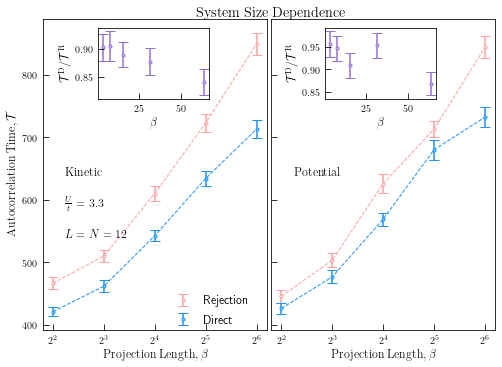

In [42]:
with plt.style.context('../IOP_large.mplstyle3'):

    # Kinetic energies subplot
    fig, ax = plt.subplots(1,2,sharey=True,sharex=True)
    plt.subplots_adjust(wspace=0.02)

    
    plt.title(r"$\rm{System\;Size\;Dependence}$", x=0.00, pad=-14)
    
    ax[0].set_xscale("log",base=2)

    ax[0].errorbar(Ls_uniform,tau_kinetic_uniform,tau_kineticErr_uniform, fmt='.', 
                 capsize=5,label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[0].plot(Ls_uniform,tau_kinetic_uniform, ls='--', 
                 lw=1,color=colors[0],zorder=1)
    ax[0].errorbar(Ls_truncated,tau_kinetic_truncated,tau_kineticErr_truncated, fmt='.', 
                 capsize=5,label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[0].plot(Ls_truncated,tau_kinetic_truncated, ls='--', 
                 lw=1,color=colors[1],zorder=1)
    ax[0].tick_params(direction='in')
    ax[0].set_ylabel(r"$\rm{Autocorrelation\;Time},\mathcal{T}$")
    ax[0].set_xlabel(r"$\rm{Projection\;Length},\beta$")
    ax[0].tick_params(direction='in')
    ax[0].annotate(r"$\rm{Kinetic}$",(0.10,0.50),xycoords="axes fraction")
    ax[0].annotate(r"$\frac{U}{t} = 3.3$",(0.10,0.40),xycoords="axes fraction")
    ax[0].annotate(r"$L=N=12$",(0.10,0.30),xycoords="axes fraction")
    ax[0].legend(frameon=False,loc=(0.550,0.00))


    ax[1].errorbar(Ls_uniform,tau_potential_uniform,tau_potentialErr_uniform, fmt='.', 
                 capsize=5,label="Rejection",color=colors[0],
                 mfc=colors_light[0],zorder=1)
    ax[1].plot(Ls_uniform,tau_potential_uniform, ls='--', 
                 lw=1,color=colors[0],zorder=1)
    ax[1].errorbar(Ls_truncated,tau_potential_truncated,tau_potentialErr_truncated, fmt='.', 
                 capsize=5,label="Direct",color=colors[1],
                 mfc=colors_light[1],zorder=1)
    ax[1].plot(Ls_truncated,tau_potential_truncated, ls='--', 
                 lw=1,color=colors[1],zorder=1)
    ax[1].set_xlabel(r"$\rm{Projection\;Length},\beta$")
    ax[1].tick_params(direction='in')
    ax[1].annotate(r"$\rm{Potential}$",(0.10,0.50),xycoords="axes fraction")

    # Insets kinetic energy
    left,bottom,width,height = [0.220,0.687,0.19,0.19*.9]
    ax2 = fig.add_axes([left,bottom,width,height])

    A = tau_kinetic_truncated
    σ_A = tau_kineticErr_truncated

    B = tau_kinetic_uniform
    σ_B = tau_kineticErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax2.errorbar(Ls_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="Rejection",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax2.tick_params(direction='in')
    ax2.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax2.set_xlabel(r"$\beta$")

    # Inset potential energy
    left,bottom,width,height = [0.609,0.687,0.19,0.19*.9]
    ax3 = fig.add_axes([left,bottom,width,height])

    A = tau_potential_truncated
    σ_A = tau_potentialErr_truncated

    B = tau_potential_uniform
    σ_B = tau_potentialErr_uniform

    f = np.abs(A/B)
    σ_f = np.abs(f)*np.sqrt((σ_A/A)**2 + (σ_B/B)**2)

    ax3.errorbar(Ls_uniform,A/B,σ_f, fmt='.', 
                 capsize=5,label="Rejection",color="mediumpurple",
                 mfc="thistle",zorder=1)

    ax3.tick_params(direction='in')
    ax3.set_ylabel(r"$\mathcal{T}^{\rm{D}}/\mathcal{T}^{\rm{R}}$")
    ax3.set_xlabel(r"$\beta$")
    
    # plt.title(r"$\beta-dependence$")

    plt.savefig("../figures/pigsfli_tau_vs_beta_critical.pdf",dpi=300)
    plt.savefig("/Users/ecasiano/Desktop/papers-truncExponSampling/figures/pigsfli_tau_vs_L_critical.pdf",dpi=300)

In [37]:
4.63263/3.083

1.5026370418423611

In [38]:
np.array([8.1071025, 5.72624])/1.5

array([5.404735  , 3.81749333])